In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\Anirban\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_transaction = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
df_transaction.txn_description.unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [4]:
df_transaction.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
#Selecting numerical features for linear regression
df_transaction = df_transaction[["customer_id","age","txn_description","balance","amount"]]

In [6]:
df_transaction.groupby('txn_description').mean()

,age,balance,amount
txn_description,,,
INTER BANK,30.991914,23823.345997,86.699461
PAY/SALARY,32.631937,16242.859049,1898.728029
PAYMENT,31.265000,19093.423212,77.613077
PHONE BANK,32.594059,37736.789703,106.099010
POS,30.084325,11870.974148,40.407412
SALES-POS,30.021098,11871.135859,39.909789


## Finding out the mean salary for each customer

In [7]:
df_salary = df_transaction[df_transaction.txn_description=='PAY/SALARY'].groupby('customer_id').mean().reset_index()

In [8]:
df_salary = df_salary[['customer_id','amount']]
df_salary=df_salary.rename(columns = {'amount':'Avg salary'})

In [9]:
df_transaction=df_transaction.merge(df_salary, on='customer_id')

## Analyzing relations between exsisting data

### Salary vs Age

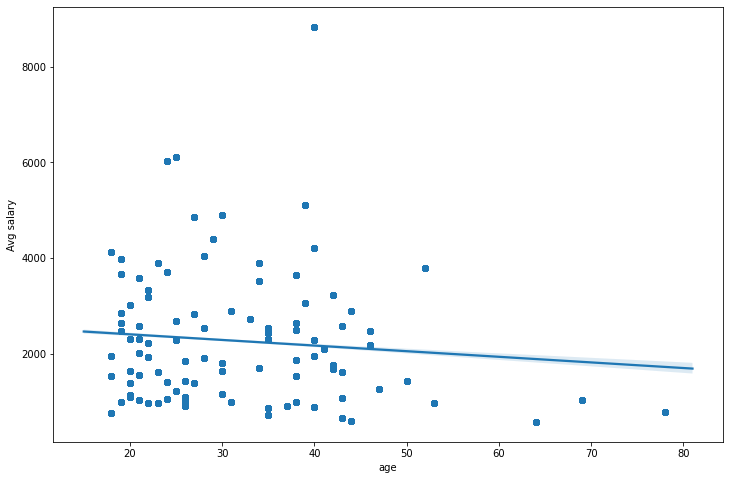

In [10]:
plt.figure(figsize=(12, 8))
sns.regplot("age", "Avg salary", data=df_transaction)

### Salary vs Account Balance

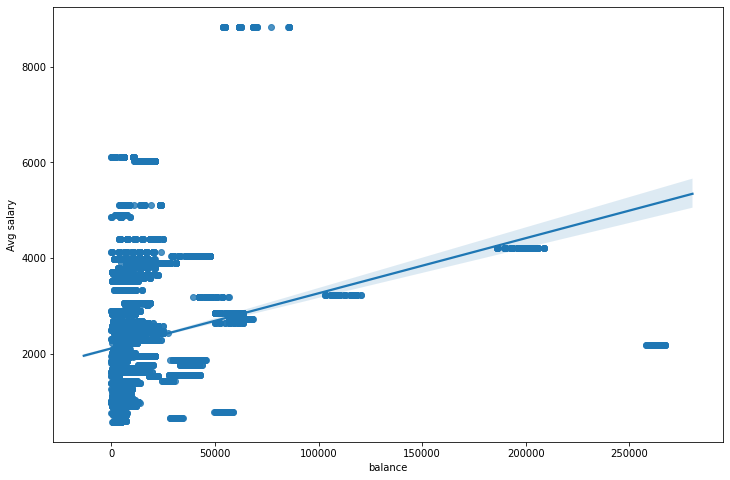

In [11]:
plt.figure(figsize=(12, 8))
sns.regplot("balance", "Avg salary", data=df_transaction)

### Salary vs Transaction Amount

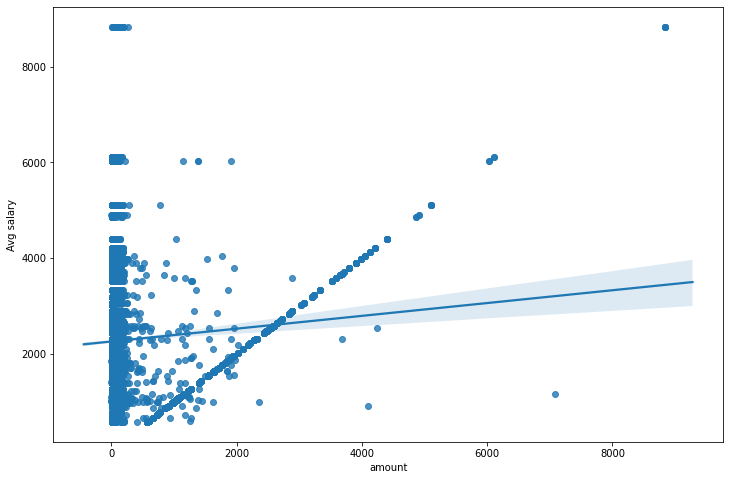

In [12]:
plt.figure(figsize=(12, 8))
sns.regplot("amount", "Avg salary", data=df_transaction)

# Data Preparation

In [13]:
# POS indicates spending behavior of customer
df_pos=df_transaction[df_transaction["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
df_pos=df_pos[["customer_id","amount"]]
df_pos=df_pos.rename(columns = {'amount':'pos'})

In [14]:
df_pos.head()

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


## Mean payment made by customers

In [15]:
df_payment=df_transaction[df_transaction["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
df_payment=df_payment[["customer_id","amount"]]
df_payment=df_payment.rename(columns = {'amount':'payment'})

In [16]:
df_payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


## Mean Inter-bank transfer by each customer

In [17]:
df_interbank=df_transaction[df_transaction["txn_description"]=='INTER BANK'].groupby("customer_id").mean().reset_index()
df_interbank=df_interbank[["customer_id","amount"]]
df_interbank=df_interbank.rename(columns = {'amount':'interbank'})

In [18]:
df_interbank.head()

,customer_id,interbank
0,CUS-1117979751,1001.0000
1,CUS-1140341822,90.0000
2,CUS-1147642491,125.0000
3,CUS-1196156254,153.4000
4,CUS-1271030853,76.1875


## Mean phone transaction made by customer

In [19]:
#Banking via phone/online pay
df_phonebank=df_transaction[df_transaction["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
df_phonebank=df_phonebank[["customer_id","amount"]]
df_phonebank=df_phonebank.rename(columns = {'amount':'phonebank'})

In [20]:
df_phonebank.head()

,customer_id,phonebank
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0


## Merging dataframes

In [21]:
df_customer=df_transaction.groupby("customer_id").mean().reset_index()
df_customer=df_customer[["customer_id","age","balance"]]
df_customer.head()

,customer_id,age,balance
0,CUS-1005756958,53,2275.852055
1,CUS-1117979751,21,9829.929000
2,CUS-1140341822,28,5699.212250
3,CUS-1147642491,34,9032.841186
4,CUS-1196156254,34,22272.433755


In [23]:
#Merging all the data frames
df_final=pd.merge(df_customer, df_payment, on="customer_id")
df_final=pd.merge(df_final, df_pos, on="customer_id")
df_final=pd.merge(df_final, df_salary, on="customer_id")
df_final.head()

,customer_id,age,balance,payment,pos,Avg salary
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73


# Feature selection

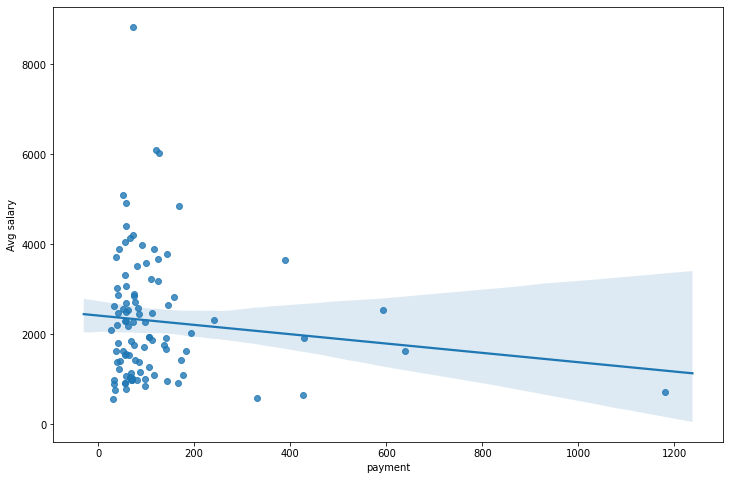

In [25]:
#Payment vs Avg Salary
plt.figure(figsize=(12, 8))
sns.regplot("payment", "Avg salary", fit_reg=True, data=df_final)

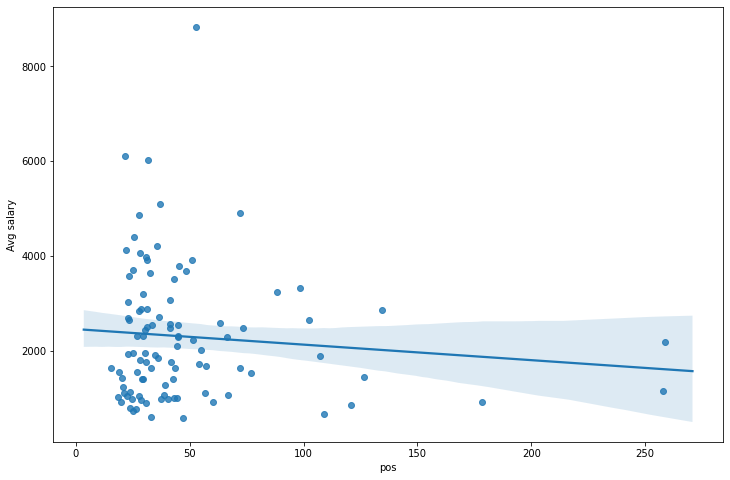

In [27]:
#Payment vs Avg Salary
plt.figure(figsize=(12, 8))
sns.regplot("pos", "Avg salary", fit_reg=True, data=df_final)

# Model  Building

## Linear Regression

In [29]:
X_train, X_test, y_train, y_test = train_test_split( df_final[["age","balance","payment","pos"]]\
                                                    , df_final[["Avg salary"]], test_size=0.2, random_state=42)

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.12665606589003586

In [31]:
y_pred=lr.predict(X_test)

In [32]:
print('Coefficient of determination: ', r2_score(y_test, y_pred))

Coefficient of determination:  0.07666219584715916


## Decision Tree

In [33]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [34]:
dt.predict(X_test)

array([ 917.45, 2639.76, 3517.61, 2218.73, 3071.14, 3649.51, 1916.51,
        917.45, 2280.36, 1043.12,  576.  , 2887.34, 3026.95, 2639.76,
       3676.94, 2718.51, 2320.3 , 3676.94, 4910.9 , 3517.61])

In [35]:
dt.score(X_test, y_test)

0.001146220955186572